In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')

In [2]:
df = pd.read_excel('./rawdata/metro_data_add_transfer.xlsx')
df

,사용월,호선명,지하철역,행정구역,transfer_line,대합실면적,승강장면적,월일수,04시-05시 승차인원,04시-05시 하차인원,...,18시-19시 체류인원,19시-20시 체류인원,20시-21시 체류인원,21시-22시 체류인원,22시-23시 체류인원,23시-24시 체류인원,00시-01시 체류인원,01시-02시 체류인원,02시-03시 체류인원,03시-04시 체류인원
0,202111,우이신설선,4.19민주묘지,강북구,1,NaN,NaN,30,2,0,...,11217,9453,5773,4917,4159,2485,28,0,0,0
1,202112,우이신설선,4.19민주묘지,강북구,1,NaN,NaN,31,0,1,...,10614,8862,5897,5278,3839,1983,0,0,0,0
2,202201,우이신설선,4.19민주묘지,강북구,1,NaN,NaN,31,3,2,...,9469,8357,5466,5723,3547,1467,0,0,0,0
3,202202,우이신설선,4.19민주묘지,강북구,1,NaN,NaN,28,0,0,...,8682,7466,4861,4527,3201,1428,0,0,0,0
4,202203,우이신설선,4.19민주묘지,강북구,1,NaN,NaN,31,0,0,...,12339,9528,5956,4907,3900,2421,41,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13056,202406,9호선,흑석(중앙대입구),동작구,1,NaN,NaN,30,4,0,...,45856,30451,23989,22119,20973,12029,3589,33,1,0
13057,202407,9호선,흑석(중앙대입구),동작구,1,NaN,NaN,31,0,0,...,43499,29759,22140,19707,18583,9695,3379,25,0,0
13058,202408,9호선,흑석(중앙대입구),동작구,1,NaN,NaN,31,5,0,...,42967,28325,21443,18406,17750,9208,2947,27,0,0
13059,202409,9호선,흑석(중앙대입구),동작구,1,NaN,NaN,30,8,0,...,46506,29741,23223,21680,19559,10470,3227,49,2,0


In [3]:
# 환승 노선 갯수별 체류인원 평균 & transfer_line set index

transfer_avg_stay = df.groupby('transfer_line').mean(numeric_only=True).reset_index()

stay_avg = transfer_avg_stay[['transfer_line'] + [col for col in df.columns if '체류인원' in col]].set_index('transfer_line')

stay_avg

,04시-05시 체류인원,05시-06시 체류인원,06시-07시 체류인원,07시-08시 체류인원,08시-09시 체류인원,09시-10시 체류인원,10시-11시 체류인원,11시-12시 체류인원,12시-13시 체류인원,13시-14시 체류인원,...,18시-19시 체류인원,19시-20시 체류인원,20시-21시 체류인원,21시-22시 체류인원,22시-23시 체류인원,23시-24시 체류인원,00시-01시 체류인원,01시-02시 체류인원,02시-03시 체류인원,03시-04시 체류인원
transfer_line,,,,,,,,,,,,,,,,,,,,,
1,125.303198,6996.369974,19810.457794,49818.987303,82387.065366,52898.390548,35620.224665,33451.422290,35729.819422,37655.891371,...,80049.948154,50401.393134,34258.244533,31560.482953,26212.508347,13567.917940,3031.191747,94.066306,1.265577,0.136962
2,102.875891,6047.070962,17870.435273,44368.275238,81371.121734,54891.559086,36993.131829,36007.692399,38303.087886,40925.152910,...,88801.473278,52775.507720,38014.414489,36456.143705,29953.107185,15158.385095,3197.361936,105.668943,1.902910,0.059086
3,231.416043,5829.251337,18086.820321,38993.132620,69247.979679,55303.455615,46388.956150,50365.900535,54805.952941,57628.425668,...,95760.346524,62521.672727,47712.047059,44421.296257,34701.722995,17275.173262,3116.487701,103.882353,2.909091,0.175401
4,278.523810,4204.964286,10883.694444,31163.761905,62840.861111,36374.444444,24117.154762,24750.738095,26930.000000,28599.523810,...,71443.079365,40046.599206,29395.230159,29597.972222,25516.349206,13758.841270,3327.071429,65.448413,2.785714,0.305556


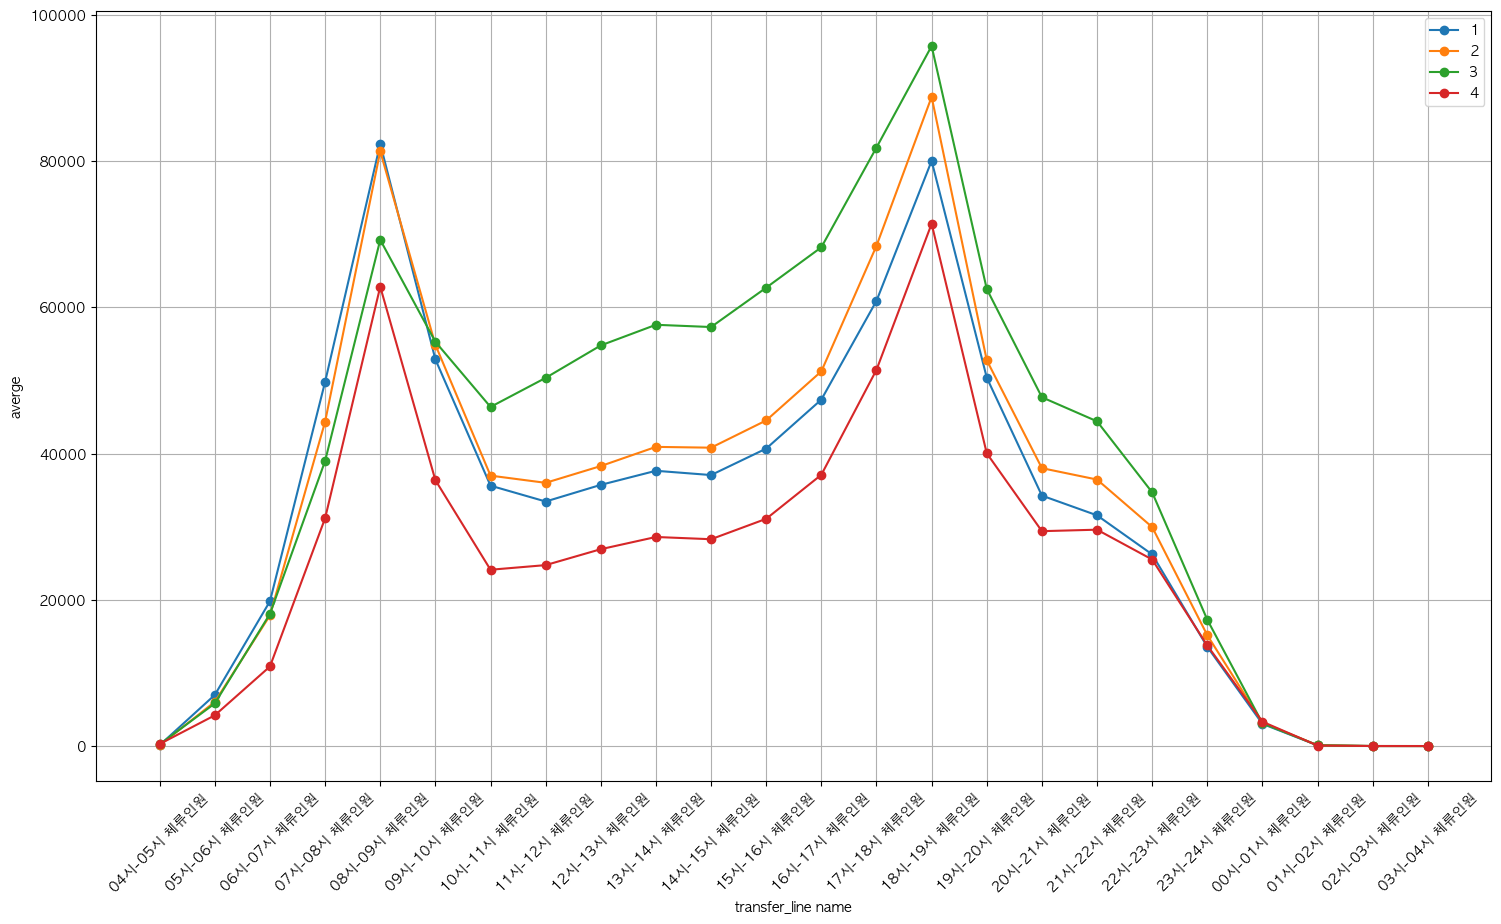

In [6]:
# 환승 노선 갯수별 체류인원 변화 transfer graph

plt.figure(figsize=(18,10))

for transfer_line in stay_avg.index:
    plt.plot([col for col in stay_avg.columns if '체류인원' in col], stay_avg.loc[transfer_line], marker='o', label=str(transfer_line))

plt.xlabel('transfer_line name')
plt.ylabel('averge')
plt.xticks(rotation=45)
plt.grid()
plt.legend(loc='best')

plt.show()

- 환승라인이 많다고 해서 유동인구가 많다고 할 수는 없음
- 환승라인 수보다는 지역에 따라 유동인구의 차이가 있다고 보는게 맞을 것 같음